# Импорт библиотек

In [1]:
import pandas as pd # для удобной работы с датасетом

import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # для построения графиков

In [2]:
DATA_DIR = "./data/" # путь до папки с данными

# Загрузить данные из data.csv

__Описание полей__


>Date:        Дата 
---
>Visits:     Кол-во визитов на сайт в день
---
>Conversion: Кол-во конвертнувшихся в поле «Добавлен в корзину» в день
---
>Sales: Кол-во продаж в день


In [3]:
df = pd.read_csv(f"{DATA_DIR}data.csv", sep="\t") # считываем данные, разделённые с помощью табуляции ("\t")
df

,Date,Visits,Conversions,Sales
0,01-Apr-2020,1732.0,242,170
1,02-Apr-2020,1690.0,302,190
2,03-Apr-2020,1585.0,277,199
3,04-Apr-2020,1613.0,256,190
4,05-Apr-2020,1660.0,198,155
...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216
1132,08-Aug-2020,939.0,278,211
1133,09-Aug-2020,860.0,233,190
1134,10-Aug-2020,911.0,273,210


Так как в дальнейшем будет работа с датами, то можно уже сейчас преобразовать колонку Date к datetime формату.

In [4]:
df["Date"][140:145] # пример неправильной даты в датасете (другой формат записи)

140    08-Sep-2019
141    09-Sep-2019
142    2019-Sep-10
143    11-Sep-2019
144    12-Sep-2019
Name: Date, dtype: object

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format='mixed') # format не "%d-%b-%y", а "mixed", чтобы все строки обрабатывались отдельно (для каждой подбирался свой формат)
df

,Date,Visits,Conversions,Sales
0,2020-04-01,1732.0,242,170
1,2020-04-02,1690.0,302,190
2,2020-04-03,1585.0,277,199
3,2020-04-04,1613.0,256,190
4,2020-04-05,1660.0,198,155
...,...,...,...,...
1131,2020-08-07,1042.0,276,216
1132,2020-08-08,939.0,278,211
1133,2020-08-09,860.0,233,190
1134,2020-08-10,911.0,273,210


# Вывести описательную статистику по полям

In [6]:
df.info() # данные о колонках (их тип, количество не NULL значений)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1136 non-null   datetime64[ns]
 1   Visits       1136 non-null   float64       
 2   Conversions  1136 non-null   int64         
 3   Sales        1136 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 35.6 KB


In [7]:
df.describe() # основные данные колонках

,Date,Visits,Conversions,Sales
count,1136,1136.000000,1136.000000,1136.000000
mean,2020-03-08 00:19:00.845070336,1207.187500,256.922535,174.939261
min,2019-09-01 00:00:00,527.000000,128.000000,43.000000
25%,2019-12-15 00:00:00,915.000000,224.000000,152.000000
50%,2020-03-18 12:00:00,1112.000000,252.000000,176.500000
75%,2020-06-01 00:00:00,1402.500000,285.000000,199.000000
max,2020-08-11 00:00:00,3421.000000,417.000000,562.000000
std,NaN,423.249078,46.458652,36.383043


In [8]:
df.nunique() # количество уникальных значений по столбцам

Date           346
Visits         306
Conversions    151
Sales          136
dtype: int64

In [9]:
print(f"В датасете {df.shape[0]} строк, из которых ~{sum(df.duplicated())/df.shape[0] * 100 :.2f}% являются полными дубликатами.") # количество строк, что являются полными дубликатами

В датасете 1136 строк, из которых ~69.10% являются полными дубликатами.


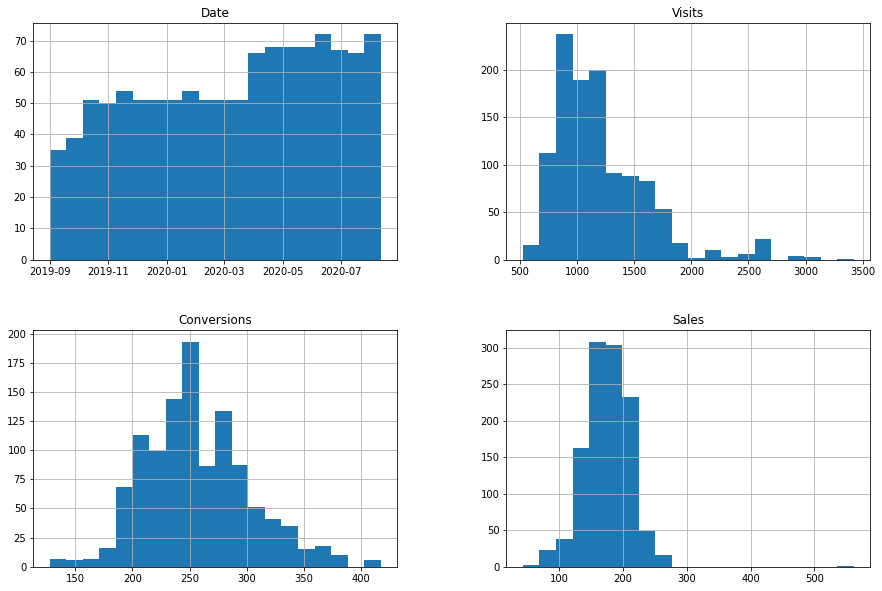

In [10]:
df.hist(bins=20, figsize=(15, 10), layout=(2, 2)) # гистограмма числовых значений данных (layout — количество строк и столбцов выводимой фигуры)
plt.show() # вывод графика

# Создать столбец год в датафрейме, заполнить значениями из Date, назвать его Y

In [11]:
df["Y"] = df["Date"].dt.year # извлекаем год из дат
df

,Date,Visits,Conversions,Sales,Y
0,2020-04-01,1732.0,242,170,2020
1,2020-04-02,1690.0,302,190,2020
2,2020-04-03,1585.0,277,199,2020
3,2020-04-04,1613.0,256,190,2020
4,2020-04-05,1660.0,198,155,2020
...,...,...,...,...,...
1131,2020-08-07,1042.0,276,216,2020
1132,2020-08-08,939.0,278,211,2020
1133,2020-08-09,860.0,233,190,2020
1134,2020-08-10,911.0,273,210,2020


In [12]:
df["Y"].value_counts() # количество различных годов

Y
2020    802
2019    334
Name: count, dtype: int64

# Посчитать долю продаж по отношению к визитам, округлить до второго знака, записать данные в столбец Conv_Sales

In [13]:
# df["Conv_Sales"] = (df["Sales"] / df["Visits"] * 100).round(2) # считаем долю продаж в процентах и округляем до двух знаков после запятой (round(2))
df["Conv_Sales"] = (df["Sales"] / df["Visits"]).round(2) # считаем долю продаж и округляем до двух знаков после запятой (round(2))
df

,Date,Visits,Conversions,Sales,Y,Conv_Sales
0,2020-04-01,1732.0,242,170,2020,0.10
1,2020-04-02,1690.0,302,190,2020,0.11
2,2020-04-03,1585.0,277,199,2020,0.13
3,2020-04-04,1613.0,256,190,2020,0.12
4,2020-04-05,1660.0,198,155,2020,0.09
...,...,...,...,...,...,...
1131,2020-08-07,1042.0,276,216,2020,0.21
1132,2020-08-08,939.0,278,211,2020,0.22
1133,2020-08-09,860.0,233,190,2020,0.22
1134,2020-08-10,911.0,273,210,2020,0.23


# Убрать из датафрейма случаи, когда количество визитов больше 3200 или доля продаж по отношению к визитам меньше 0,05

Удаляемые данные:

In [14]:
df[df["Visits"] > 3200]

,Date,Visits,Conversions,Sales,Y,Conv_Sales
1095,2020-07-02,3421.0,255,200,2020,0.06


In [15]:
df[df["Conv_Sales"] < 0.05]

,Date,Visits,Conversions,Sales,Y,Conv_Sales
163,2019-10-02,2594.0,208,43,2019,0.02
167,2019-10-06,2177.0,179,86,2019,0.04
477,2019-10-02,2594.0,208,43,2019,0.02
481,2019-10-06,2177.0,179,86,2019,0.04
821,2019-10-02,2594.0,208,43,2019,0.02
825,2019-10-06,2177.0,179,86,2019,0.04


Таблица без этих данных:

In [16]:
df = df[(df["Visits"] <= 3200) & (df["Conv_Sales"] >= 0.05)] # оставляем только те строки, которые проходят сразу по двум условиям
df

,Date,Visits,Conversions,Sales,Y,Conv_Sales
0,2020-04-01,1732.0,242,170,2020,0.10
1,2020-04-02,1690.0,302,190,2020,0.11
2,2020-04-03,1585.0,277,199,2020,0.13
3,2020-04-04,1613.0,256,190,2020,0.12
4,2020-04-05,1660.0,198,155,2020,0.09
...,...,...,...,...,...,...
1131,2020-08-07,1042.0,276,216,2020,0.21
1132,2020-08-08,939.0,278,211,2020,0.22
1133,2020-08-09,860.0,233,190,2020,0.22
1134,2020-08-10,911.0,273,210,2020,0.23


Строк стало на 7 меньше.

# Каждый 7, 17 и 27 день месяца мы проводим акции, поэтому создайте новый столбец Flag_Act, в котором 1 - это день акции, 0 - нет

In [17]:
def sale(row: pd.Series) -> bool:
    """
    Функция, принимающая строку (pd.Series объект) и возвращающая True, если день в заданном списке, иначе — False.
    Parameters:
        row (pd.Series) : Строка датасета.
    Returns:
        bool: True, если день в заданном списке, иначе — False.
    """
    return row["Date"].day in [7, 17, 27] # возвращаем 1 (True), если день с акцией, иначе — 0 (False)

In [18]:
# df["Flag_Act"] = df.apply(sale, axis=1) # axis=1 — применяем функцию к строкам DataFrame
df.loc[:, "Flag_Act"] = df.apply(sale, axis=1) # axis=1 — применяем функцию к строкам DataFrame (loc чтобы убрать SettingWithCopyWarning)
df

C:\Users\User\Documents\TEMP\ipykernel_40004\1765679643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Flag_Act"] = df.apply(sale, axis=1) # axis=1 — применяем функцию к строкам DataFrame (loc чтобы убрать SettingWithCopyWarning)


,Date,Visits,Conversions,Sales,Y,Conv_Sales,Flag_Act
0,2020-04-01,1732.0,242,170,2020,0.10,False
1,2020-04-02,1690.0,302,190,2020,0.11,False
2,2020-04-03,1585.0,277,199,2020,0.13,False
3,2020-04-04,1613.0,256,190,2020,0.12,False
4,2020-04-05,1660.0,198,155,2020,0.09,False
...,...,...,...,...,...,...,...
1131,2020-08-07,1042.0,276,216,2020,0.21,True
1132,2020-08-08,939.0,278,211,2020,0.22,False
1133,2020-08-09,860.0,233,190,2020,0.22,False
1134,2020-08-10,911.0,273,210,2020,0.23,False


# Сгруппировать датафрейм по столбцам Y и Flag_Act, и вывести среднюю долю продаж по отношению к визитам, столбец назвать "Avg_Conv_Sales", датафрейм назвать df_agg

In [19]:
df_agg = df.groupby(["Y", "Flag_Act"], as_index=False).agg(
    Avg_Conv_Sales=("Conv_Sales", "mean")
) # делаем группировку (as_index=False чтобы столбцы группировки не шли как сложный индекс, а были обычными полями), потом берём столбец "Conv_Sales" и считаем среднее значение по нему ("mean", можно даже отдельную lambda функцию написать) в зависимости от группы, после чего результат записываем в новый столбец Avg_Conv_Sales
df_agg

,Y,Flag_Act,Avg_Conv_Sales
0,2019,False,0.100881
1,2019,True,0.106061
2,2020,False,0.187479
3,2020,True,0.181519


# ! Пришла информация о том, что появились обновленные данные по продажам (data_corr.csv), новые данные содержат как новые даты, так и корректировки к старому датафрейму. 
# Вам необходимо добавить новые данные к старому датафрейму: 
>## 1)Если даты уже были в старом датафрейме, то заменить базовые данные(Visits,Conversions,Sales) на данные из файла data_corr. 
>## 2)Если таких дат не было, то заполнить их данными из файла data_corr. 
>## 3)Информацию по тем датам, которых нет в data_corr, оставить без изменений (как в старом датафрейме)

In [20]:
df_corr = pd.read_csv(f"{DATA_DIR}data_corr.csv", sep="\t") # считываем данные, разделённые с помощью табуляции ("\t")
df_corr["Date"] = pd.to_datetime(df_corr["Date"], format='mixed') # format не "%d-%b-%y", а "mixed", чтобы все строки обрабатывались отдельно (для каждой подбирался свой формат)
df_corr

,Date,Visits,Conversions,Sales
0,2020-08-01,2440,253,98
1,2020-08-02,1041,367,88
2,2020-08-03,2668,214,94
3,2020-08-04,1517,295,107
4,2020-08-05,2713,311,104
5,2020-08-06,2563,357,84
6,2020-08-07,958,211,82
7,2020-08-08,1036,308,88
8,2020-08-09,1248,379,90
9,2020-08-10,2074,359,74


Данные, что будут обновлены:

In [21]:
df[df["Date"].isin(df_corr["Date"])]

,Date,Visits,Conversions,Sales,Y,Conv_Sales,Flag_Act
122,2020-08-01,975.0,232,170,2020,0.17,False
123,2020-08-02,898.0,257,181,2020,0.20,False
124,2020-08-03,1013.0,300,216,2020,0.21,False
125,2020-08-04,1053.0,273,200,2020,0.19,False
126,2020-08-05,847.0,298,224,2020,0.26,False
127,2020-08-06,870.0,269,204,2020,0.23,False
128,2020-08-07,1042.0,276,216,2020,0.21,True
129,2020-08-08,939.0,278,211,2020,0.22,False
130,2020-08-09,860.0,233,190,2020,0.22,False
131,2020-08-10,911.0,273,210,2020,0.23,False


Данные, что будут добавлены:

In [22]:
df_corr[~df_corr["Date"].isin(df["Date"])] # ~ для отрицания

,Date,Visits,Conversions,Sales
11,2020-08-12,2898,231,105
12,2020-08-13,2296,315,78
13,2020-08-14,2409,320,100
14,2020-08-15,961,226,105
15,2020-08-16,1000,378,106
16,2020-08-17,2740,394,82
17,2020-08-18,719,307,79
18,2020-08-19,2650,364,99
19,2020-08-20,1311,359,108
20,2020-08-21,1361,292,76


Создаём новый DataFrame с учётом данными из data_corr.

In [23]:
df_updated = df[["Date", "Visits", "Conversions", "Sales"]] # делаем срез нужных столбцов
df_updated = pd.merge(df_updated, df_corr, how='outer', on=["Date"], suffixes=["_old", "_corrected"]) # объединяем датафреймы с помощью outer join по совпадению колонки on
# данные остаются из обоих таблиц сразу, если они были только в левой → то стлбцы из правой будут с NaN, и наоборот, если были только в правой → то колонки из левой будут иметь значение NaN
# если значение колонки on (дата) присутствовали в обоих датафреймах, то колонки будут без пустых значений
df_updated

,Date,Visits_old,Conversions_old,Sales_old,Visits_corrected,Conversions_corrected,Sales_corrected
0,2019-09-01,1816.0,138.0,82.0,NaN,NaN,NaN
1,2019-09-01,1816.0,138.0,82.0,NaN,NaN,NaN
2,2019-09-02,1814.0,162.0,97.0,NaN,NaN,NaN
3,2019-09-02,1814.0,162.0,97.0,NaN,NaN,NaN
4,2019-09-03,1617.0,207.0,115.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1144,2020-08-27,NaN,NaN,NaN,2296.0,281.0,79.0
1145,2020-08-28,NaN,NaN,NaN,600.0,304.0,112.0
1146,2020-08-29,NaN,NaN,NaN,1062.0,371.0,102.0
1147,2020-08-30,NaN,NaN,NaN,808.0,248.0,115.0


Оставляем только нужную информацию.

In [24]:
def combine(row: pd.Series) -> tuple:
    """
    Функция, принимающая строку (pd.Series объект) и возвращающая несколько значений (корректные значения столбцов "Visits", "Conversions", "Sales").
    Parameters:
        row (pd.Series) : Строка датасета.
    Returns:
        tuple: Корректные значения "Visits", "Conversions" и "Sales".
    """
    return_data = (
        row["Visits_corrected"] if pd.notna(row["Visits_corrected"]) else row["Visits_old"], # если "corrected" значение не NaN, то возвращаем его, иначе — старое ("old") значение
        row["Conversions_corrected"] if pd.notna(row["Conversions_corrected"]) else row["Conversions_old"],
        row["Sales_corrected"] if pd.notna(row["Sales_corrected"]) else row["Sales_old"]
    )

    return return_data

In [25]:
df_updated[["Visits", "Conversions", "Sales"]] = df_updated.apply(combine, axis=1, result_type='expand') # axis=1 — применяем функцию к строкам DataFrame (result_type="expand" автоматически расширяет результаты, подобные списку или tuple, в новые столбцы ~ pd.DataFrame объект из нескольких столбцов)
df_updated.drop(columns=[col + suffix for col in ["Visits", "Conversions", "Sales"] for suffix in ["_old", "_corrected"]], inplace=True) # удаляем старые столбцы
df_updated

,Date,Visits,Conversions,Sales
0,2019-09-01,1816.0,138.0,82.0
1,2019-09-01,1816.0,138.0,82.0
2,2019-09-02,1814.0,162.0,97.0
3,2019-09-02,1814.0,162.0,97.0
4,2019-09-03,1617.0,207.0,115.0
...,...,...,...,...
1144,2020-08-27,2296.0,281.0,79.0
1145,2020-08-28,600.0,304.0,112.0
1146,2020-08-29,1062.0,371.0,102.0
1147,2020-08-30,808.0,248.0,115.0


# К новосформированному датафрейму применить все те же условия и группировки, что и для старого датафрейма (ограничения на количество визитов, долю продаж, акционные дни и тп)

In [26]:
df_updated["Y"] = df_updated["Date"].dt.year # извлекаем год из дат

df_updated["Conv_Sales"] = (df_updated["Sales"] / df_updated["Visits"]).round(2) # считаем долю продаж и округляем до двух знаков после запятой (round(2))

df_updated = df_updated[(df_updated["Visits"] <= 3200) & (df_updated["Conv_Sales"] >= 0.05)] # оставляем только те строки, которые проходят сразу по двум условиям

df_updated["Flag_Act"] = df_updated.apply(sale, axis=1) # axis=1 — применяем функцию к строкам DataFrame
df_updated

C:\Users\User\Documents\TEMP\ipykernel_40004\1616139714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated["Flag_Act"] = df_updated.apply(sale, axis=1) # axis=1 — применяем функцию к строкам DataFrame


,Date,Visits,Conversions,Sales,Y,Conv_Sales,Flag_Act
0,2019-09-01,1816.0,138.0,82.0,2019,0.05,False
1,2019-09-01,1816.0,138.0,82.0,2019,0.05,False
2,2019-09-02,1814.0,162.0,97.0,2019,0.05,False
3,2019-09-02,1814.0,162.0,97.0,2019,0.05,False
4,2019-09-03,1617.0,207.0,115.0,2019,0.07,False
...,...,...,...,...,...,...,...
1142,2020-08-25,553.0,379.0,105.0,2020,0.19,False
1145,2020-08-28,600.0,304.0,112.0,2020,0.19,False
1146,2020-08-29,1062.0,371.0,102.0,2020,0.10,False
1147,2020-08-30,808.0,248.0,115.0,2020,0.14,False


# Получите аггрегацию по столбцам Y и Flag_Act в новом датафрейме, выведите среднюю долю продаж по отношению к визитам в новом датафрейме

In [27]:
df_updated_agg = df_updated.groupby(["Y", "Flag_Act"], as_index=False).agg(
    Avg_Conv_Sales=("Conv_Sales", "mean")
) # делаем группировку (as_index=False чтобы столбцы группировки не шли как сложный индекс, а были обычными полями), потом берём столбец "Conv_Sales" и считаем среднее значение по нему ("mean", можно даже отдельную lambda функцию написать) в зависимости от группы, после чего результат записываем в новый столбец Avg_Conv_Sales
df_updated_agg

,Y,Flag_Act,Avg_Conv_Sales
0,2019,False,0.100881
1,2019,True,0.106061
2,2020,False,0.181915
3,2020,True,0.175443


# Покажите абсолютное изменение этого показателя в старом датафрейме (до корректировки) с новым датафреймом (после корректировки), округлите его до четвертого знака после запятой

In [28]:
df_compar = pd.merge(df_agg, df_updated_agg, how="inner", on=["Y", "Flag_Act"], suffixes=["_old", "_corrected"]) # объединяем таблицы для сравнения
df_compar["Change"] = (df_compar["Avg_Conv_Sales_corrected"] - df_compar["Avg_Conv_Sales_old"]).round(4) # считаем изменение в показателях с округлением
df_compar["Change_abs"] = abs(df_compar["Avg_Conv_Sales_corrected"] - df_compar["Avg_Conv_Sales_old"]).round(4) # считаем абсолютное изменение в показателях с округлением
df_compar[["Y", "Flag_Act", "Change", "Change_abs"]]

,Y,Flag_Act,Change,Change_abs
0,2019,False,0.0000,0.0000
1,2019,True,0.0000,0.0000
2,2020,False,-0.0056,0.0056
3,2020,True,-0.0061,0.0061


# Визуализируйте данные и/или изменение старого и нового датафрейма любым способом, который посчитаете информативным

### Визуализация распределения данных после корректировки

In [29]:
data_for_plot = {
    "Visits": pd.concat([df["Visits"], df_updated["Visits"]]), # объединяем pd.Series объекты из двух датасетов в один
    "Sales": pd.concat([df["Sales"], df_updated["Sales"]]),
    "Conv_Sales": pd.concat([df["Conv_Sales"], df_updated["Conv_Sales"]]),
    "Type": ["Old"] * df.shape[0] + ["Updated"] * df_updated.shape[0] # метки для данных, принадлежит ли запись по определённому индексу к тому или иному датафрейму 
}
data_for_plot = pd.DataFrame(data_for_plot)
data_for_plot

,Visits,Sales,Conv_Sales,Type
0,1732.0,170.0,0.10,Old
1,1690.0,190.0,0.11,Old
2,1585.0,199.0,0.13,Old
3,1613.0,190.0,0.12,Old
4,1660.0,155.0,0.09,Old
...,...,...,...,...
1142,553.0,105.0,0.19,Updated
1145,600.0,112.0,0.19,Updated
1146,1062.0,102.0,0.10,Updated
1147,808.0,115.0,0.14,Updated


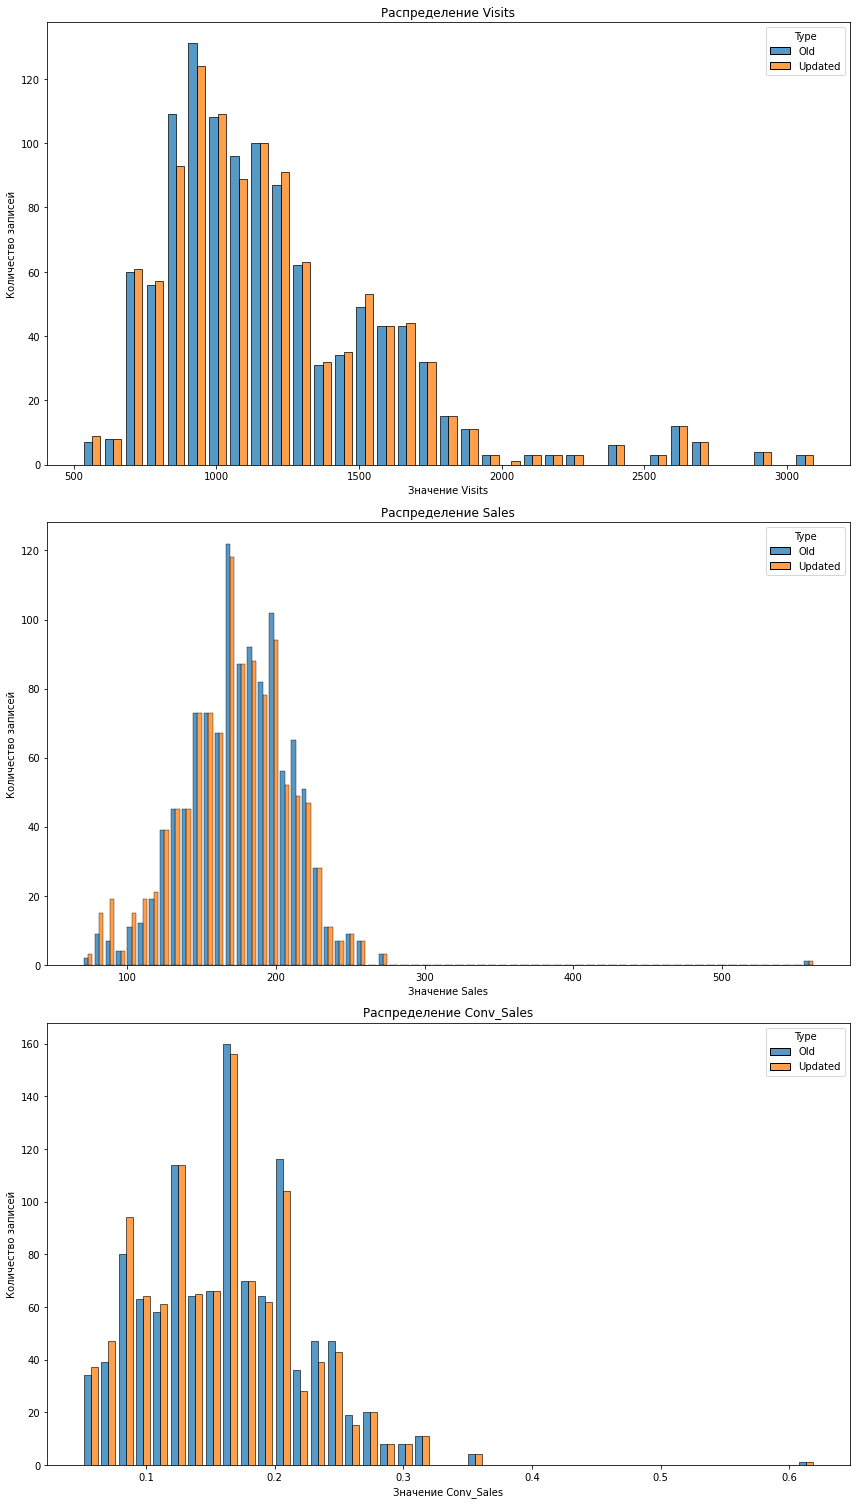

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 21))

for ax, col_name in zip(axes, ["Visits", "Sales", "Conv_Sales"]):
    sns.histplot(data=data_for_plot, x=col_name, hue="Type", multiple='dodge', shrink=0.8, ax=ax) # multiple="dodge" для расположения шкал разных датасетов рядом друг с другом, без наложения (multiple="stack" для наложения как при суммировании значений)

    ax.set_title(f"Распределение {col_name}") # название графика
    ax.set_xlabel(f"Значение {col_name}") # подпись по оси x
    ax.set_ylabel("Количество записей") # подпись по оси y

# plt.legend() # вывод подписей графиков
plt.tight_layout() # автоматическая настройка подфигур для их плотного расположения без перекрытий
plt.show() # вывод графика

По графикам можно заметить, что при корректировке данных стало меньше значений с высоким уровнем дневных продаж, тогда как с меньшим количеством продаж их стало больше (график "Распределение Sales"). <br>
График отношения дневных продаж к количеству посещений так же показывает уменьшение количества дней с высокой конверсией и увеличение дней с низкой конверсией.

### Визуализация изменений средней конверсии после корректировки

In [31]:
def combine_group(row: pd.Series) -> str:
    """
    Функция, принимающая строку (pd.Series объект) и возвращающая объединённое значение нескольких столбцов в виде строки.
    Parameters:
        row (pd.Series) : Строка датасета.
    Returns:
        str: Объединение значений столбцов в виде строки.
    """
    return str(row["Y"]) + (", дни с акцией" if row["Flag_Act"] else ", дни без акции")

In [32]:
df_compar["Date"] = df_compar.apply(combine_group, axis=1) # axis=1 — применяем функцию к строкам DataFrame
df_compar

,Y,Flag_Act,Avg_Conv_Sales_old,Avg_Conv_Sales_corrected,Change,Change_abs,Date
0,2019,False,0.100881,0.100881,0.0000,0.0000,"2019, дни без акции"
1,2019,True,0.106061,0.106061,0.0000,0.0000,"2019, дни с акцией"
2,2020,False,0.187479,0.181915,-0.0056,0.0056,"2020, дни без акции"
3,2020,True,0.181519,0.175443,-0.0061,0.0061,"2020, дни с акцией"


In [33]:
data_for_plot_change = {
    "Avg_Conv_Sales": pd.concat([df_compar["Avg_Conv_Sales_old"], df_compar["Avg_Conv_Sales_corrected"]]), # объединяем pd.Series объекты в один
    "Date": pd.concat([df_compar["Date"], df_compar["Date"]]),
    "Type": ["Old"] * df_compar.shape[0] + ["Updated"] * df_compar.shape[0] # метки для данных, принадлежит ли запись по определённому индексу к тому или иному датафрейму 
}
data_for_plot_change = pd.DataFrame(data_for_plot_change)
data_for_plot_change

,Avg_Conv_Sales,Date,Type
0,0.100881,"2019, дни без акции",Old
1,0.106061,"2019, дни с акцией",Old
2,0.187479,"2020, дни без акции",Old
3,0.181519,"2020, дни с акцией",Old
0,0.100881,"2019, дни без акции",Updated
1,0.106061,"2019, дни с акцией",Updated
2,0.181915,"2020, дни без акции",Updated
3,0.175443,"2020, дни с акцией",Updated


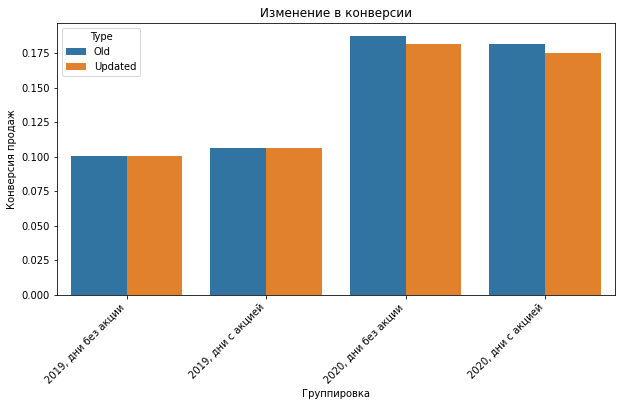

In [34]:
plt.figure(figsize=(10,5)) # задание размера фигуры

sns.barplot(data=data_for_plot_change, x="Date", y="Avg_Conv_Sales", hue="Type") # столбчатая диаграмма с дивергенцией по hue
plt.xticks(rotation=45, ha='right') # поворот на 45 градусов подписей под осью OX (ha='right' ~ правый конец соответствует колонке)

plt.title("Изменение в конверсии") # название фигуры
plt.xlabel("Группировка") # подпись по оси x
plt.ylabel("Конверсия продаж") # подпись по оси y
# plt.legend() # вывод подписей графиков
plt.show() # вывод графика

По данному графику можно увидеть, что конверсия продаж в 2020-м году после корректировки слегка упала, как в дни с акцией, так и без неё.

### Линейный вариант предыдущего графика

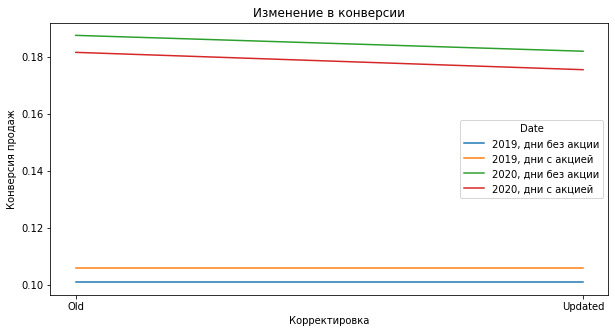

In [35]:
plt.figure(figsize=(10,5)) # задание размера фигуры

sns.lineplot(data=data_for_plot_change, x="Type", y="Avg_Conv_Sales", hue="Date") # линейный график с дивергенцией по hue
# plt.xticks(rotation=45, ha='right') # поворот на 45 градусов подписей под осью OX (ha='right' ~ правый конец соответствует колонке)

plt.title("Изменение в конверсии") # название фигуры
plt.xlabel("Корректировка") # подпись по оси x
plt.ylabel("Конверсия продаж") # подпись по оси y
# plt.legend() # вывод подписей графиков
plt.show() # вывод графика